In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from scipy import stats
import os

In [11]:
#plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}',
                                       r'\usepackage{sansmath}',
                                       r'\sansmath',
                                       r'\usepackage{siunitx}',
                                       r'\sisetup{detect-all}']
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.axisbelow'] = True
plt.rcParams.update({'font.size':24})

In [3]:
def savefig(fig, filename):
    cmd = 'convert {} -trim {}'.format(filename, filename)
    fig.savefig(filename, bbox_inches='tight', dpi=300)
    os.system(cmd)

In [4]:
#ps02 = pd.read_json('test2/ps_crash02.json').sort_index()
#ap_ps02 = ps02.a.mean()
#dap_ps02 = ps02.a.std()
#print(r'PS: radius: {0:.3f} +/- {1:.3f} um'.format(ap_ps02, dap_ps02))
#print(r'refractive index: {0:.3f} +/- {1:.3f} um'.format(ps02.n.mean(), ps02.n.std()))

In [5]:
#si02 = pd.read_json('test2/si_crash02.json').sort_index()
#ap_si02 = si02.a.mean()
#dap_si02 = si02.a.std()
#print(r'SiO2: radius: {0:.3f} +/- {1:.3f} um'.format(ap_si02, dap_si02))
#print(r'refractive index: {0:.3f} +/- {1:.3f} um'.format(si02.n.mean(), si02.n.std()))

/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


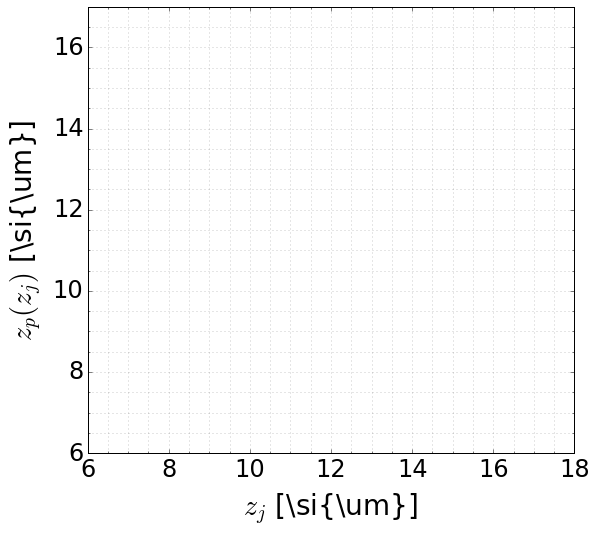

In [6]:

plt.figure(figsize=(9,8))
ax = plt.gcf().gca()

# Formatting
plt.xlim([6, 18])
plt.ylim([6, 17])
plt.xlabel(r'$z_j$ [\si{\um}]')
plt.ylabel(r'$z_p(z_j)$ [\si{\um}]')
plt.legend(fontsize=24, loc='lower right')
plt.minorticks_on()
plt.grid(which='both', zorder=3, alpha=0.4)

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

ax.set_aspect('equal')
savefig(plt, 'crash04.png')

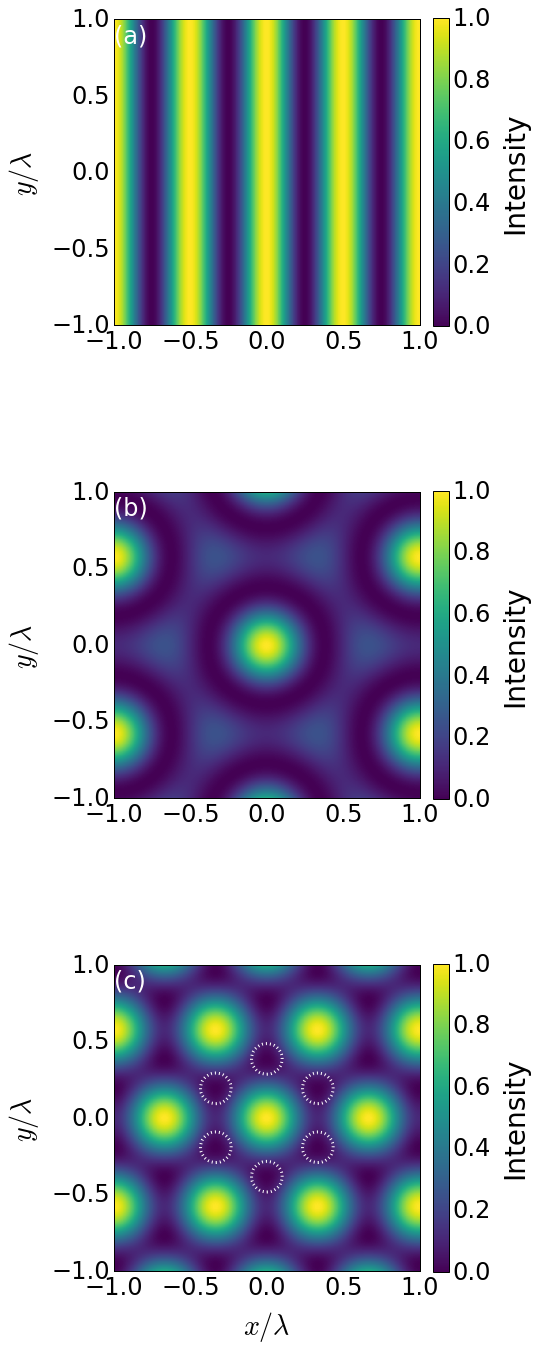

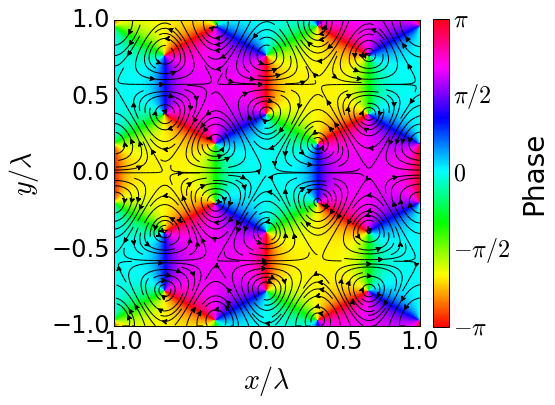

In [19]:
from __future__ import division

import numpy as np
import matplotlib.pyplot  as plt
import matplotlib.patches as pat
from matplotlib import rc
## Parameters
k      = (2*np.pi)       # Lengths will be in units of wavelength
p0     = 1        # Pressure amplitude of each source
xRange = 2  
yRange = 2
num    = 1000      # Number of points in each direction


## Coordinate Arrays
xL = np.linspace(-xRange/2,xRange/2,num=num)
yL = np.linspace(-yRange/2,yRange/2,num=num)
xG, yG = np.meshgrid(xL,yL) 

## Plane Standing Wave (two sources)
p2 = (p0/2) * (np.exp(1j*k*xG) + np.exp(-1j*k*xG) )

## Three Standing Waves? (six sources)
p6 = (p0/6)*( np.exp(-1j*k*xG) +np.exp(1j*k*xG) + np.exp(1j*k *( (1/2)*xG -(np.sqrt(3)/2)*yG) )+ np.exp(-1j*k *( (1/2)*xG -(np.sqrt(3)/2)*yG) ) + np.exp(1j*k*( (1/2)*xG + (np.sqrt(3)/2)*yG ) )+np.exp(-1j*k*( (1/2)*xG + (np.sqrt(3)/2)*yG ) ) )


## Three Momentum-Cancelling Plane Waves (three sources)
def p3(xG,yG):
  p3result = (p0/3) * ( np.exp(-1j*k*xG) + np.exp(1j*k *( (1/2)*xG -(np.sqrt(3)/2)*yG) ) + np.exp(1j*k*( (1/2)*xG + (np.sqrt(3)/2)*yG ) ) )
  return p3result

phase3 = np.angle( p3(xG,yG) )
phase3Grad = np.gradient(phase3)

reduceFac = int(num/50)
xGreduced = xG[0::reduceFac,0::reduceFac]
yGreduced = yG[0::reduceFac,0::reduceFac]
phase3reduced = np.angle( p3(xGreduced,yGreduced) )
phase3GradreducedUnNorm = np.gradient(phase3reduced)
phase3Gradreduced= 10*phase3GradreducedUnNorm/(np.sqrt( (phase3GradreducedUnNorm[0])**2 + (phase3GradreducedUnNorm[1])**2) )

## INTENSITY PLOTS


abcX  = -1
abcY  = 0.85
abcColor = 'white'

ax1=plt.subplot(3,1,1,aspect='equal')
p1 = plt.pcolormesh(xG,yG, np.abs(p2)**2, cmap='viridis')
plt.text(abcX,abcY,'(a)',color=abcColor)

plt.xlim([-xRange/2,xRange/2])
plt.ylim([-yRange/2,yRange/2])
#plt.title('Intensity')
plt.ylabel(r'$y/\lambda$ ')
c1 = plt.colorbar(fraction=0.046, pad=0.04, ticks=[0.,.2,.4,.6,.8,1.0])
p1.set_clim([0,1])
c1.set_label('Intensity')

ax2= plt.subplot(3,1,2,aspect='equal')
p2 = plt.pcolormesh(xG,yG, np.abs(p6)**2, cmap='viridis')
plt.text(abcX,abcY,'(b)',color=abcColor)
plt.xlim([-xRange/2,xRange/2])
plt.ylim([-yRange/2,yRange/2])
plt.ylabel(r'$y/\lambda$ ')
c2 = plt.colorbar(fraction=0.046, pad=0.04, ticks=[0.,.2,.4,.6,.8,1.0])
p2.set_clim([0,1])
c2.set_label('Intensity')

ax3=plt.subplot(3,1,3,aspect='equal')
p3 = plt.pcolormesh(xG,yG, np.abs( p3(xG,yG) )**2, cmap='viridis')
plt.text(abcX,abcY,'(c)',color=abcColor)
plt.xlim([-xRange/2,xRange/2])
plt.ylim([-yRange/2,yRange/2])
plt.ylabel(r'$y/\lambda$ ')
c3 = plt.colorbar(fraction=0.046, pad=0.04, ticks=[0.,.2,.4,.6,.8,1.0])
p3.set_clim([0,1])
c3.set_label('Intensity')

#Create circles on each node 
circles = []
rad = 0.1
R = 4*np.pi/(3*np.sqrt(3)*k)
lw = 2


centers=[]
centers.append( np.array((0,R)) ) #Calculated one node, others are just 60 degree rotations from it
theta = np.radians(60)
for i in range(1,6):
	newCenter = (np.cos(theta)*centers[i-1][0]-np.sin(theta)*centers[i-1][1],np.sin(theta)*centers[i-1][0]+np.cos(theta)*centers[i-1][1])
	centers.append( newCenter ) #Do the rotations, put a circle around each point

for i in range(6):
	circles.append( pat.Circle(centers[i],  rad , fill=False, lw=3,ls=':', color='white') ) #Draw those circles


arrows = []
connect = pat.ConnectionStyle("Arc3",rad=.375)
head = pat.ArrowStyle("<-",head_length=4,head_width=4)
for i in range(6):
	arrows.append( pat.FancyArrowPatch( posA=( centers[i]-np.array((rad,0))), posB= ( centers[i] -np.array((0,rad))) , arrowstyle=head, color='white',connectionstyle=connect ,lw=lw) ) 
for i in range(6):
	ax3.add_patch( circles[i] )
	#ax3.add_patch( arrows [i]  )

plt.xlabel(r'$x/\lambda$ ')
f=plt.gcf()
f.set_size_inches(6,24,forward=True)

savefig( f, 'IntensityPlotAuto.png' )
plt.show()

## PHASE PLOT

ax4=plt.subplot(1,1,1,aspect='equal')
p4 = plt.pcolormesh(xG,yG, phase3, cmap='hsv')
p4.set_clim([-np.pi,np.pi])

	
plt.xlim([-xRange/2,xRange/2])
plt.ylim([-yRange/2,yRange/2])
#plt.title('Phase')
plt.ylabel(r'$y/\lambda$ ')
plt.xlabel(r'$x/\lambda$ ')
c4 = plt.colorbar(fraction=0.046, pad=0.04, ticks=[-np.pi,-np.pi/2,0,np.pi/2,np.pi])
c4.set_label('Phase')
c4.ax.set_yticklabels([r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'])
circles = []
#for i in range(6):
	#circles.append( pat.Circle(centers[i],  rad , fill=False, lw=3,ls=':', color='black') ) #Draw those circles
#for i in range(6):
	#ax4.add_patch( circles[i] )
# STREAMPLOT 
ax5 = plt.subplot(1,1,1,aspect='equal')
streamPoints = np.zeros((num,2))
streamPoints[:,0] =  np.linspace(-xRange/2,xRange/2,num)
streamPoints[:,1] = -np.linspace(-yRange/2,yRange/2,num)

ax4.streamplot(xG,yG, phase3Grad[1] ,  phase3Grad[0] ,color='black', density=2, arrowstyle='fancy' )

#plt.xlim([-xRange/2,xRange/2])
#plt.ylim([-yRange/2,yRange/2])
#plt.title('Phase Gradient')
#plt.ylabel(r'$y/\lambda$ ')
#plt.xlabel(r'$x/\lambda$ ')	
f=plt.gcf()
f.set_size_inches(6,24,forward=True)

savefig( f , 'PhasePlotAuto.png' )

plt.show()

## ACOUSTIC POTENTIAL